In [1]:
%matplotlib inline
import os
from os.path import dirname, abspath, join
from os import getcwd
import sys

In [2]:
import random
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import torch
from IPython.display import clear_output

In [3]:
seed = 161
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [8]:
#solar_data/CSV files contain the values of GSR (Global Solar Radiation in MegaJoules per meters squared per hour)
#weather_data/CSV files contain the values of GSR (Global Solar Radiation in MegaJoules per meters squared per hour)
location = 'tokyo'
year = 2000

THIS_DIR = getcwd()
SDATA_DIR = abspath(join(THIS_DIR, 'solar_data'))  #abspath(join(THIS_DIR, '../../..', 'data'))
WDATA_DIR = abspath(join(THIS_DIR, 'weather_data'))  #abspath(join(THIS_DIR, '../../..', 'data'))

total_fcast = []

for location in ['tokyo']:
    for year in np.arange(2000,2001): #2017 and 2018 for minamidaito are corrupted
        sfile = SDATA_DIR + '/' + location +'/' + str(year) + '.csv'
        wfile = WDATA_DIR + '/' + location +'/' + str(year) + '.csv'

        #skiprows=4 to remove unnecessary title texts
        #usecols=4 to read only the Global Solar Radiation (GSR) values
        solar_radiation = pd.read_csv(sfile, skiprows=4, encoding='shift_jisx0213', usecols=[4])
        fcast_am = pd.read_csv(wfile, skiprows=4, encoding='shift_jisx0213', usecols=[3])
        fcast_pm = pd.read_csv(wfile, skiprows=4, encoding='shift_jisx0213', usecols=[6])

        #convert dataframe to numpy array
        solar_radiation = solar_radiation.values

        #convert missing data in CSV files to zero
        solar_radiation[np.isnan(solar_radiation)] = 0

        #reshape solar_radiation into no_of_daysx24 array
        solar_radiation = solar_radiation.reshape(-1,24)

        #get forecast data, flatten the array and convert to list
        fcast_am = fcast_am.values.flatten().tolist()
#         fcast_pm = fcast_pm.values.flatten().tolist()

        fcast_am = [item.replace('\u3000','') for item in fcast_am] #remove pesky UNICODE character
#         fcast_pm = [item.replace('\u3000','') for item in fcast_am] #remove pesky UNICODE character

        fcast_am = [item.split('、',1)[0] for item in fcast_am] #remove data after Japanese commas
#         fcast_pm = [item.split('、',1)[0] for item in fcast_am] #remove data after Japanese commas
        
#         fcast_am = [item.split(r'霧雨',-1)[0] for item in fcast_am] #霧雨 - group all ligth drizzles into one group
#         fcast_pm = [item.split(r'霧雨',-1)[0] for item in fcast_pm] #霧雨 - group all ligth drizzles into one group

total_fcast = np.append(total_fcast,fcast_am)

In [11]:
day_radiation = np.sum(solar_radiation,axis=1)

(array([31., 45., 35., 60., 47., 41., 32., 24., 31., 20.]),
 array([ 0.69 ,  3.325,  5.96 ,  8.595, 11.23 , 13.865, 16.5  , 19.135,
        21.77 , 24.405, 27.04 ]),
 <a list of 10 Patch objects>)

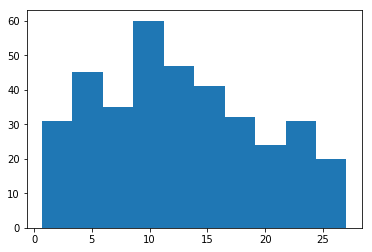

In [23]:
plt.hist(day_radiation, bins=10)

In [20]:
for x,y in zip(fcast_am, day_radiation):
    print(x,y)

晴時々曇 10.71
曇時々雨 6.470000000000001
快晴 9.83
晴後一時曇 10.73
曇一時雨 6.87
雨時々曇 5.12
曇 3.8500000000000005
快晴 4.7
曇時々雨 4.42
晴後曇 8.49
晴後曇 10.71
雨 1.1300000000000001
曇時々雨 2.9499999999999997
曇後一時雨 9.370000000000001
曇時々雨 8.08
雨時々曇 5.74
曇時々雨後一時晴 2.7
曇 10.81
曇時々晴 1.81
快晴 9.33
快晴 12.86
曇一時雨 11.67
晴時々曇 9.830000000000002
曇時々晴一時あられ 7.69
曇一時雪 2.33
晴時々曇 12.219999999999999
晴 10.62
快晴 12.92
薄曇 12.48
快晴 11.91
曇後晴 12.399999999999999
晴後曇 13.340000000000002
晴後一時曇 12.9
晴後曇 10.690000000000001
快晴 13.43
晴後曇 13.46
曇一時雨後晴 6.99
曇時々晴 13.560000000000002
曇一時雪 10.4
快晴 13.7
快晴 15.59
快晴 14.06
快晴 13.9
曇後一時雨 9.629999999999999
晴 5.369999999999999
晴一時曇 11.91
快晴 11.52
晴一時曇 15.959999999999999
晴後薄曇 13.26
曇後一時雨 8.18
曇 3.04
快晴 16.1
晴 17.310000000000002
曇時々雨 14.52
快晴 14.150000000000002
晴後曇 17.79
曇一時雪後晴 4.640000000000001
晴 12.969999999999999
快晴 17.32
晴 18.54
快晴 18.36
晴 17.580000000000002
薄曇 16.18
雨時々曇 5.23
曇時々雨 6.99
曇後晴 4.3100000000000005
晴一時曇 16.13
快晴 14.25
晴 18.98
晴後曇 19.64
曇後雨 9.7
晴一時曇 8.54
快晴 18.08
快晴 17.259999999999998
曇後一時雨 17.3
晴 1

In [5]:
forecast, counts = np.unique(total_fcast, return_counts=True)
# forecast = [item.replace('\u3000','') for item in forecast] #remove pesky UNICODE character
# forecast = [item.split('、',1)[0] for item in forecast] #remove data after Japanese commas

In [6]:
z = [[x,y] for x,y in zip(forecast, counts)]
for zx in forecast:
    print(zx) 

大雨
大雨後晴
大雨後曇一時晴
快晴
晴
晴一時大雨
晴一時曇
晴一時薄曇
晴一時雨
晴後一時曇
晴後一時薄曇
晴後一時雨
晴後曇
晴後曇一時雨
晴後曇時々雨
晴後薄曇
晴時々曇
晴時々曇一時雨
晴時々薄曇
曇
曇一時大雨
曇一時晴
曇一時雨
曇一時雨後一時晴
曇一時雨後晴
曇一時雪
曇一時雪後晴
曇後一時晴
曇後一時雨
曇後晴
曇後雨
曇時々晴
曇時々晴一時あられ
曇時々晴一時雨
曇時々雨
曇時々雨後一時晴
曇時々雨後晴
薄曇
薄曇一時晴
薄曇後晴
雨
雨一時曇
雨後一時曇
雨後時々曇
雨後晴
雨後曇
雨後曇一時晴
雨時々曇
雨時々曇後晴


In [7]:
unique_ds = unique[np.argsort(-counts)]
sorted_array = np.sort(counts)
counts_ds = sorted_array[::-1]

NameError: name 'unique' is not defined

In [ ]:
for x,y in zip(unique_ds, counts_ds):
    print(x,y)